# Lesson_LinearRegression_boston

In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# 데이터 로드
boston = load_boston()
# CRIM: 범죄율
# INDUS: 비소매상업지역 면적 비율
# NOX: 일산화질소 농도
# RM: 주택당 방 수
# LSTAT: 인구 중 하위 계층 비율
# B: 인구 중 흑인 비율
# PTRATIO: 학생/교사 비율
# ZN: 25,000 평방피트를 초과 거주지역 비율
# CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
# AGE: 1940년 이전에 건축된 주택의 비율
# RAD: 방사형 고속도로까지의 거리
# DIS: 직업센터의 거리
# TAX: 재산세율

In [40]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [41]:
boston['feature_names'] # = boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [42]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

In [49]:
X.iloc[10:15]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
14,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47


In [50]:
y.tail()

,price
501,22.4
502,20.6
503,23.9
504,22.0
505,11.9


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [61]:
# Linear Regression 클래스 객체 생성
model = LinearRegression() # fit_intercept = 상수항 유무 결정

In [62]:
# fit 메서드로 모형 추정 (오그멘테이션은 자동으로 수행)
model_lr = model.fit(X_train, y_train)

In [63]:
print('weight: ', model_lr.coef_)
print('bias: ', model_lr.intercept_)

weight:  [[-8.85840180e-02  4.20767396e-02 -4.96451999e-02  2.88459495e+00
  -1.27578293e+01  4.58302988e+00 -2.30189303e-02 -1.47806877e+00
   2.22435974e-01 -9.98099915e-03 -8.87726596e-01  1.06194558e-02
  -3.98027892e-01]]
bias:  [27.73449217]


In [64]:
model.score(X_train, y_train)

0.7680873773172154

In [65]:
model.score(X_test, y_test)

0.631366280877081

In [66]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
# 생성된 모델을 가지고 예측하기
# 입력데이터의 평균값
X.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [12]:
# 입력데이터의 평균값을 변형하여 만든 가상의 데이터이다.
X_new = [3.6, 12, 12, 0.05, 0.4, 6.5, 79, 4, 9, 400, 19, 354, 12]
print(type(X_new))

# 원래 데이터와 동일한 형태의 데이터프레임을 만들어야 한다.
dfx_new = pd.DataFrame(np.array(X_new)[:, np.newaxis].T, columns=boston.feature_names)
print(dfx_new)

predictions_new = model_boston.predict(dfx_new)
print('prediction:', predictions_new)

<class 'list'>
   CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0   3.6  12.0   12.0  0.05  0.4  6.5  79.0  4.0  9.0  400.0     19.0  354.0   

   LSTAT  
0   12.0  
prediction: [[25.53627661]]


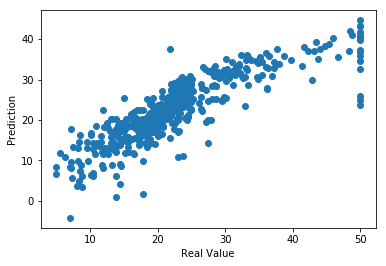

In [13]:
# 실제 값과 예측값 비교
predictions = model_boston.predict(X)

plt.scatter(y, predictions)
plt.xlabel(u"Real Value")
plt.ylabel(u"Prediction")
plt.show()